# Heart Disease
## Description
This is a simple feed forward network for heart disease dataset
    https://www.kaggle.com/ronitf/heart-disease-uci

## Performance
This model achieves ~80% test accuracy after 500 epochs using a 80/20 split for training and testing.

## Training
The network consists of two layers with 32 units each, with relu activation, and l2 regularization. The final layer uses sigmoid activation.
During training the batch size was set to 64, and RMSProp with 0.0005 learning rate.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from models.mlp import FeedForwardNetwork
from utils.loading import Loader
from utils.trainer import Trainer

tf.enable_eager_execution()

# Constants

In [2]:
EPOCHS = 500
LEARNING_RATE = 0.0005
BATCH_SIZE = 64
TRAIN_FRACTION = 0.8
WEIGHT_DECAY = 0.02
DROPOUT = 0.1

# Load data and preprocess

In [7]:
loader = Loader('datasets/heart.csv')
features = loader.get_features().difference(['target']).tolist()
target_feature = 'target'
loader.set_features(features + [target_feature])

['age', 'ca', 'chol', 'cp', 'exang', 'fbs', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'thalach', 'trestbps']


# Explore data

   age  ca  chol  cp  exang  fbs  oldpeak  restecg  sex  slope  thal  thalach  \
0   63   0   233   3      0    1      2.3        0    1      0     1      150   
1   37   0   250   2      0    0      3.5        1    1      0     2      187   
2   41   0   204   1      0    0      1.4        0    0      2     2      172   
3   56   0   236   1      0    0      0.8        1    1      2     2      178   
4   57   0   354   0      1    0      0.6        1    0      2     2      163   

   trestbps  target  
0       145       1  
1       130       1  
2       130       1  
3       120       1  
4       120       1  


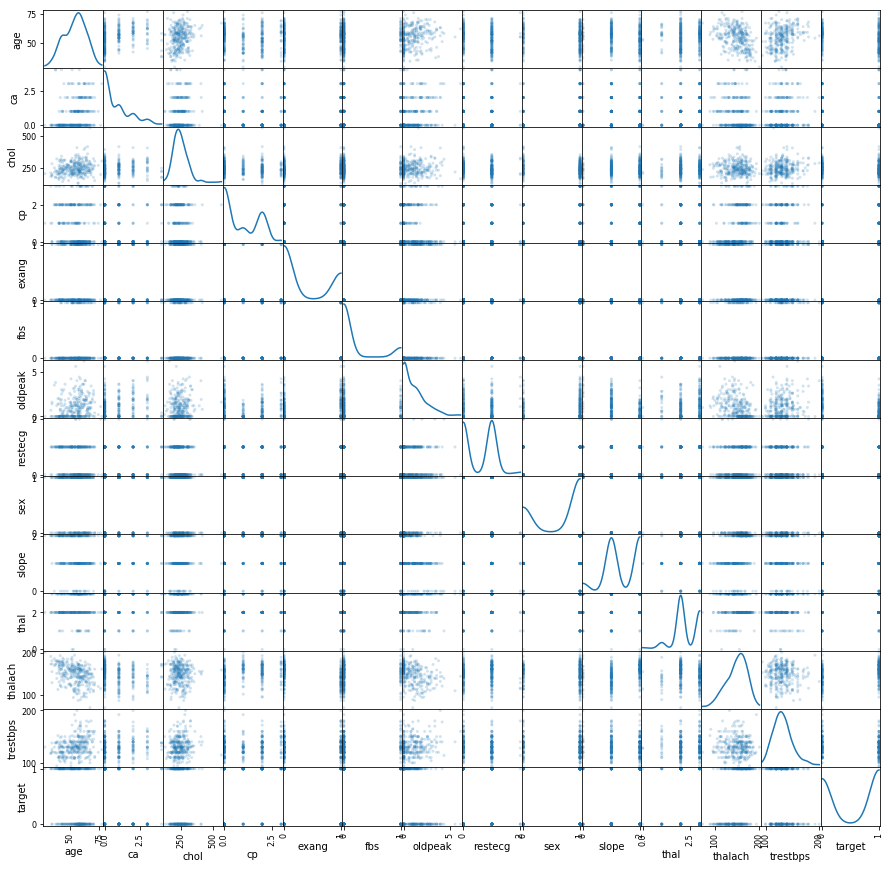

In [17]:
data = loader.get_data()
print(data.head())
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='kde');

# Create model and train

In [18]:
def compute_accuracy(logits, targets):
    preds = tf.round(logits)
    corrects = 1 - tf.abs(preds - targets)
    return tf.reduce_mean(corrects)

def compute_loss(targets, logits):
    losses = tf.losses.absolute_difference(targets, logits)
    loss_value = tf.reduce_mean(losses)
    return loss_value

In [19]:
# Load data
train_data, test_data = loader.get_data_split(TRAIN_FRACTION)

# Create model and optimizer
model = FeedForwardNetwork(units=[32, 32], l2_weight_decay=WEIGHT_DECAY)
optimizer = tf.train.RMSPropOptimizer(learning_rate=LEARNING_RATE)

# Train
trainer = Trainer(model, optimizer, train_data, test_data, compute_loss, compute_accuracy)
train_losses, train_accs, test_losses, test_accs = trainer.train(EPOCHS, BATCH_SIZE)

Epoch 01 - Train[Loss=1.002, Metric=0.651], Test[Loss=1.032, Metric=0.475]
Epoch 02 - Train[Loss=1.002, Metric=0.651], Test[Loss=1.032, Metric=0.475]
Epoch 03 - Train[Loss=1.001, Metric=0.651], Test[Loss=1.032, Metric=0.475]
Epoch 04 - Train[Loss=1.001, Metric=0.651], Test[Loss=1.031, Metric=0.475]
Epoch 05 - Train[Loss=1.001, Metric=0.651], Test[Loss=1.031, Metric=0.475]
Epoch 06 - Train[Loss=1.000, Metric=0.651], Test[Loss=1.031, Metric=0.475]
Epoch 07 - Train[Loss=0.999, Metric=0.655], Test[Loss=1.030, Metric=0.459]
Epoch 08 - Train[Loss=0.998, Metric=0.655], Test[Loss=1.030, Metric=0.475]
Epoch 09 - Train[Loss=0.997, Metric=0.655], Test[Loss=1.029, Metric=0.475]
Epoch 10 - Train[Loss=0.996, Metric=0.655], Test[Loss=1.028, Metric=0.475]
Epoch 11 - Train[Loss=0.994, Metric=0.655], Test[Loss=1.027, Metric=0.475]
Epoch 12 - Train[Loss=0.992, Metric=0.656], Test[Loss=1.026, Metric=0.475]
Epoch 13 - Train[Loss=0.990, Metric=0.661], Test[Loss=1.025, Metric=0.475]
Epoch 14 - Train[Loss=0.9

Epoch 113 - Train[Loss=0.342, Metric=0.883], Test[Loss=0.473, Metric=0.721]
Epoch 114 - Train[Loss=0.339, Metric=0.883], Test[Loss=0.470, Metric=0.721]
Epoch 115 - Train[Loss=0.336, Metric=0.883], Test[Loss=0.468, Metric=0.721]
Epoch 116 - Train[Loss=0.334, Metric=0.883], Test[Loss=0.465, Metric=0.721]
Epoch 117 - Train[Loss=0.331, Metric=0.883], Test[Loss=0.463, Metric=0.721]
Epoch 118 - Train[Loss=0.329, Metric=0.883], Test[Loss=0.460, Metric=0.721]
Epoch 119 - Train[Loss=0.326, Metric=0.883], Test[Loss=0.458, Metric=0.721]
Epoch 120 - Train[Loss=0.324, Metric=0.883], Test[Loss=0.455, Metric=0.721]
Epoch 121 - Train[Loss=0.322, Metric=0.883], Test[Loss=0.453, Metric=0.721]
Epoch 122 - Train[Loss=0.319, Metric=0.883], Test[Loss=0.451, Metric=0.721]
Epoch 123 - Train[Loss=0.317, Metric=0.883], Test[Loss=0.448, Metric=0.721]
Epoch 124 - Train[Loss=0.315, Metric=0.887], Test[Loss=0.446, Metric=0.721]
Epoch 125 - Train[Loss=0.313, Metric=0.887], Test[Loss=0.444, Metric=0.721]
Epoch 126 - 

Epoch 232 - Train[Loss=0.237, Metric=0.900], Test[Loss=0.367, Metric=0.754]
Epoch 233 - Train[Loss=0.237, Metric=0.900], Test[Loss=0.367, Metric=0.754]
Epoch 234 - Train[Loss=0.236, Metric=0.900], Test[Loss=0.367, Metric=0.754]
Epoch 235 - Train[Loss=0.236, Metric=0.900], Test[Loss=0.367, Metric=0.754]
Epoch 236 - Train[Loss=0.236, Metric=0.900], Test[Loss=0.367, Metric=0.754]
Epoch 237 - Train[Loss=0.236, Metric=0.900], Test[Loss=0.367, Metric=0.754]
Epoch 238 - Train[Loss=0.236, Metric=0.900], Test[Loss=0.366, Metric=0.754]
Epoch 239 - Train[Loss=0.236, Metric=0.900], Test[Loss=0.366, Metric=0.754]
Epoch 240 - Train[Loss=0.236, Metric=0.900], Test[Loss=0.366, Metric=0.754]
Epoch 241 - Train[Loss=0.236, Metric=0.900], Test[Loss=0.366, Metric=0.754]
Epoch 242 - Train[Loss=0.235, Metric=0.900], Test[Loss=0.366, Metric=0.754]
Epoch 243 - Train[Loss=0.235, Metric=0.900], Test[Loss=0.366, Metric=0.754]
Epoch 244 - Train[Loss=0.235, Metric=0.900], Test[Loss=0.365, Metric=0.754]
Epoch 245 - 

Epoch 351 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.350, Metric=0.803]
Epoch 352 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.350, Metric=0.803]
Epoch 353 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.350, Metric=0.803]
Epoch 354 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.350, Metric=0.803]
Epoch 355 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.350, Metric=0.803]
Epoch 356 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.350, Metric=0.803]
Epoch 357 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.350, Metric=0.803]
Epoch 358 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.350, Metric=0.803]
Epoch 359 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.349, Metric=0.803]
Epoch 360 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.349, Metric=0.803]
Epoch 361 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.349, Metric=0.803]
Epoch 362 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.349, Metric=0.803]
Epoch 363 - Train[Loss=0.227, Metric=0.894], Test[Loss=0.349, Metric=0.803]
Epoch 364 - 

Epoch 467 - Train[Loss=0.224, Metric=0.894], Test[Loss=0.342, Metric=0.803]
Epoch 468 - Train[Loss=0.224, Metric=0.894], Test[Loss=0.342, Metric=0.803]
Epoch 469 - Train[Loss=0.224, Metric=0.894], Test[Loss=0.342, Metric=0.803]
Epoch 470 - Train[Loss=0.224, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 471 - Train[Loss=0.224, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 472 - Train[Loss=0.224, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 473 - Train[Loss=0.223, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 474 - Train[Loss=0.223, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 475 - Train[Loss=0.223, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 476 - Train[Loss=0.223, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 477 - Train[Loss=0.223, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 478 - Train[Loss=0.223, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 479 - Train[Loss=0.223, Metric=0.894], Test[Loss=0.341, Metric=0.803]
Epoch 480 - 

# Plot results

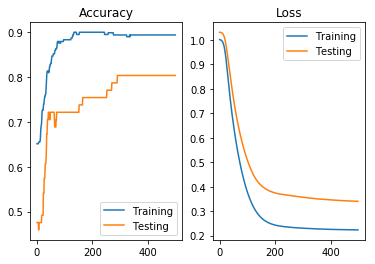

In [20]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(train_accs)
ax1.plot(test_accs)
ax1.set_title("Accuracy")
ax1.legend(['Training', 'Testing'])
ax2.plot(train_losses)
ax2.plot(test_losses)
ax2.set_title("Loss")
ax2.legend(['Training', 'Testing'])
plt.show()